In [1]:
# Dependencies
import tweepy
import json
import time
import numpy as np
import pandas as pd
from config import consumer_key, consumer_secret, access_token, access_token_secret
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



Please enter the Twitter handle (including @ for example @CNN): @CNN
LucCarriere2018
rick3428


KeyboardInterrupt: 

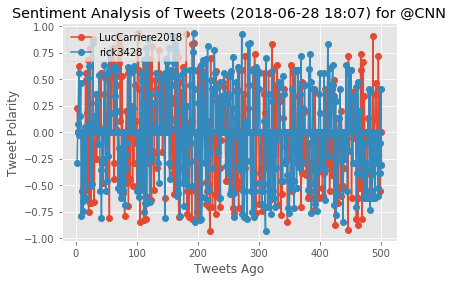

In [21]:
handles = []
#Ask for user to input twitter user name
targetinput = input('Please enter the Twitter handle (including @ for example @CNN): ')
check = 0

#Check if username has been used
for x in handles:
    if targetinput==x:
        handles.append(targetinput)
        check=1

#Loop five minutes checking for any mentions
while(check==0):
    mentions = api.search(targetinput, count = 10, results_type="recent")
    for tweet in mentions['statuses']:
#         pprint(tweet)
        mention =tweet['entities']['user_mentions'][0]['screen_name']
#         print(mention)
        sn = tweet['user']['screen_name']
#         print(sn)
    
    if len(mentions)!=0:
        runTweetFunc(targetinput, sn)
        
    time.sleep(300)

In [20]:
#Create Function to Call this
def runTweetFunc(temp_target, name):

    # Target Search Term
    target = temp_target
    name = name
    counter=1

    # Variable for holding the oldest tweet
    oldest_tweet = None

    results_list = []

    for x in range(25):

        # Run search around each tweet
        public_tweets = api.user_timeline(target, max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:


            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago=counter

            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

            counter += 1

            # Store the Average Sentiments
            sentiment = {
                "User": target,
                "Date":tweet["created_at"],
                "Compound": compound,
                "Positive": pos,
                "Neutral": neu,
                "Negative": neg,
                "Tweets Ago": counter
                }

    # Print the Sentiments
    # print(sentiment)
    # print()

            results_list.append(sentiment)

    # Create DataFrame from Results List
    results_df = pd.DataFrame(results_list)
    results_df

        # Create plot
    x_val=results_df["Tweets Ago"]
    y_val=results_df["Compound"]
    plt.plot(x_val,y_val, marker='o',label=name)

    # # Incorporate the other graph properties
    now = datetime.now()
    now = now.strftime("%Y-%m-%d %H:%M")
    plt.title(f"Sentiment Analysis of Tweets ({now}) for {target}")
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.legend(loc='upper left')
    # plt.show()

    plt.savefig("testoutput.png")

    # Create a status update
    api.update_with_media("testoutput.png",
                          "Are you.. talking to me?")